In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Titanic.csv")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


1. cabin, embarked 변수의 값중 ""로 처리된 값을 NA로 바꾸고, 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고, age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

In [2]:
# cabin, embarked 변수 값 ""-> NA
data['cabin'] = data['cabin'].replace("",np.nan)
data['embarked'] = data['embarked'].replace("",np.nan)

data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [4]:
data.astype({'name':'str','ticket':'str','cabin':'str','pclass':'category','survived':'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [5]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [8]:
#수치형 변수 결측 : 중앙값
#범주형 변수 결측 : 최빈값

data['age'].fillna(data['age'].median(),inplace = True)
data['fare'].fillna(data['fare'].median(),inplace = True)
data['cabin'].fillna(data['cabin'].mode()[0],inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)

data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [14]:
#age_1변수 생성
def get_category(age):
    cat = ''
    if age < 0 : cat = 'unknown'
    elif age < 10 : cat = 0
    elif age < 20 : cat = 1
    elif age < 30 : cat = 2
    elif age < 40 : cat = 3
    elif age < 50 : cat = 4
    elif age < 60 : cat = 5
    elif age < 70 : cat = 6
    elif age < 80 : cat = 7
    else: cat = 8
        
    return cat
        
        
data['age_1'] = data['age'].apply(lambda x: get_category(x))
data['age_1'].value_counts()

2    607
3    232
1    143
4    135
0     82
5     70
6     32
7      7
8      1
Name: age_1, dtype: int64

In [16]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,2


2. 전처리가 완료된 데이터를 train 70%, test 30% 데이터로 분할하시오(set.seed(12345)). 또한, train 데이터로 종속변수인 survived를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 에측값을 csv파일로 각각 제출하시오. 

In [17]:
# X,y 데이터 설정
X = data[['pclass','sibsp','parch','fare','embarked']]
y = data['survived']

In [20]:
#라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['embarked'] = le.fit_transform(X['embarked'])

<ipython-input-20-810326c3d6bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embarked'] = le.fit_transform(X['embarked'])


In [21]:
#train-test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=12345)

- 랜덤포레스트 분류

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
rf_pred = pd.DataFrame(rf_pred)
rf_pred.to_csv("RandomForestClassifier.csv",index=False)

- 의사결정나무

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)
dt_pred = pd.DataFrame(dt_pred)
dt_pred.to_csv("DecisionTreeClassifier.csv",index=False)

- 로지스틱 회귀분석

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)
lr_pred = pd.DataFrame(dt_pred)
dt_pred.to_csv("LogisticRegression.csv",index=False)

3. 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고 AUC값을 산출하시오. 

In [27]:
from sklearn.metrics import accuracy_score

print('랜덤포레스트 정확도 : {:.4f}'.format(accuracy_score(y_test,rf_pred)))
print("의사결정나무 정확도 : {:.4f}".format(accuracy_score(y_test, dt_pred)))
print("로지스틱 회귀분석 정확도 : {:.4f}".format(accuracy_score(y_test,lr_pred)))

랜덤포레스트 정확도 : 0.6794
의사결정나무 정확도 : 0.6718
로지스틱 회귀분석 정확도 : 0.6718


In [31]:
#ROC커브
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

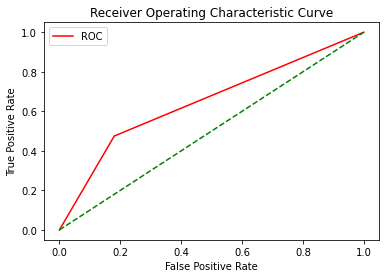

랜덤포레스트 AUC : 0.6474


In [32]:
#랜덤포레스트
rf_fper, rf_tper, rf_thresholds = roc_curve(y_test,rf_pred)
plot_roc_curve(rf_fper, rf_tper)
print('랜덤포레스트 AUC : {:.4f}'.format(roc_auc_score(y_test,rf_pred)))

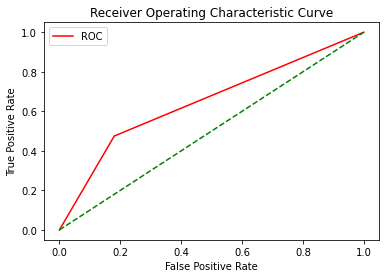

의사결정나무 AUC : 0.6331


In [33]:
#의사결정나무

dt_fper, dt_tper, dt_thresholds = roc_curve(y_test,rf_pred)
plot_roc_curve(dt_fper, dt_tper)
print('의사결정나무 AUC : {:.4f}'.format(roc_auc_score(y_test,dt_pred)))

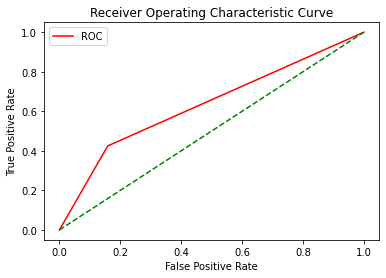

로지스틱회귀분석 AUC : 0.6331


In [34]:
#로지스틱회귀분석

lr_fper, lr_tper, lr_thresholds = roc_curve(y_test,lr_pred)
plot_roc_curve(lr_fper, lr_tper)
print('로지스틱회귀분석 AUC : {:.4f}'.format(roc_auc_score(y_test,lr_pred)))